# Exploratory Data Analysis for Taxi GPS data

### Load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
# Read into a pandas dataframe
df = pd.read_csv("./data/train.csv", nrows=10000)

In [4]:
df['MISSING_DATA'].value_counts()


MISSING_DATA
False    1710660
True          10
Name: count, dtype: int64

In [7]:
df.columns

Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE'],
      dtype='object')

In [16]:
new_df = df[df['MISSING_DATA'] == False].reset_index(drop=True)

In [5]:
cleaned_df = df.reset_index(drop=True)

In [6]:
cleaned_df['MISSING_DATA'].value_counts()

MISSING_DATA
False    1710660
True          10
Name: count, dtype: int64

In [10]:
from datetime import datetime


In [11]:
timestamp = int(1727833970)

In [12]:
new_time = datetime.fromtimestamp(timestamp)
print(new_time.strftime("%Y-%m-%d %H:%M:%S"))

2024-10-01 19:52:50


In [15]:
test_df['geo_length'] = df['POLYLINE'].str.len()-1 *15

In [22]:
polyline_column = df.iloc[1]['POLYLINE']

In [23]:
polyline_column

'[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-8.646921,41.160951],[-8.649999,41.161491],[-8.653167,41.162031],[-8.656434,41.16258],[-8.660178,41.163192],[-8.663112,41.163687],[-8.666235,41.1642],[-8.669169,41.164704],[-8.670852,41.165136],[-8.670942,41.166576],[-8.66961,41.167962],[-8.668098,41.168988],[-8.66664,41.170005],[-8.665767,41.170635],[-8.66574,41.170671]]'

In [13]:
# Get the data types of the columns
column_types = df.dtypes

In [14]:
# Count the occurences of each data type
type_counts = column_types.value_counts()

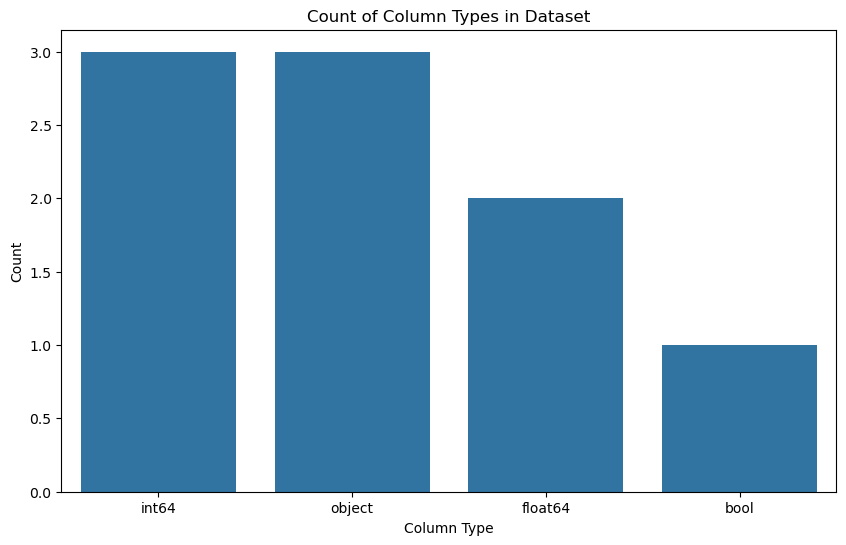

In [15]:
# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index.astype(str), y=type_counts.values)
plt.xlabel("Column Type")
plt.ylabel("Count")
plt.title("Count of Column Types in Dataset")
plt.show()

In [ ]:
df.count()

In [24]:
import random
import time


In [25]:
rand_timestamps = [random.randint(1, int(time.time())) for _ in range(5)]

In [26]:
rand_timestamps

[1672024955, 357223268, 1286429319, 1217817752, 1057457493]

In [27]:
df = pd.DataFrame({"TIMESTAMP": pd.to_datetime(rand_timestamps, unit='s')})

In [28]:
df

,TIMESTAMP
0,2022-12-26 03:22:35
1,1981-04-27 12:41:08
2,2010-10-07 05:28:39
3,2008-08-04 02:42:32
4,2003-07-06 02:11:33


In [33]:
df['POLYLINE']

0       [[-8.618643,41.141412],[-8.618499,41.141376],[...
1       [[-8.639847,41.159826],[-8.640351,41.159871],[...
2       [[-8.612964,41.140359],[-8.613378,41.14035],[-...
3       [[-8.574678,41.151951],[-8.574705,41.151942],[...
4       [[-8.645994,41.18049],[-8.645949,41.180517],[-...
                              ...                        
9995    [[-8.66808,41.154651],[-8.668089,41.154651],[-...
9996    [[-8.583129,41.164731],[-8.583129,41.164785],[...
9997    [[-8.600103,41.18274],[-8.599806,41.182722],[-...
9998    [[-8.5878,41.174568],[-8.587782,41.174595],[-8...
9999    [[-8.613144,41.166774],[-8.613333,41.166675],[...
Name: POLYLINE, Length: 10000, dtype: object

In [34]:
travel_df = df['POLYLINE'].str.len()-1*15

In [35]:
travel_df

0        485
1        398
2       1393
3        923
4        619
        ... 
9995    1071
9996    1517
9997    1185
9998    1337
9999     678
Name: POLYLINE, Length: 10000, dtype: int64

In [72]:
df['POLYLINE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: POLYLINE
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [59]:
df['First_Coordinate'] = df['POLYLINE'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None
)


In [68]:
import ast
# Function to safely convert string to list
def safe_convert(polyline_str):
    try:
        return ast.literal_eval(polyline_str)
    except (ValueError, SyntaxError):
        return None

# Apply the conversion
df['POLYLINE_LIST'] = df['POLYLINE'].apply(safe_convert)

In [73]:
df['POLYLINE_LIST'] == df['POLYLINE']

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [75]:
new_df = df['POLYLINE'].apply(lambda x:x[0])

In [76]:
new_df

0       [
1       [
2       [
3       [
4       [
       ..
9995    [
9996    [
9997    [
9998    [
9999    [
Name: POLYLINE, Length: 10000, dtype: object

In [63]:
df['First_Coordinate'] = df['POLYLINE_LIST'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None
)


In [65]:
df['last_Coordinate'] = df['POLYLINE_LIST'].apply(
    lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else None
)

print("\nDataFrame with last Coordinate:")
print(df)


DataFrame with last Coordinate:
                  TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID  \
0     1372636858620000589         C          NaN           NaN  20000589   
1     1372637303620000596         B          NaN           7.0  20000596   
2     1372636951620000320         C          NaN           NaN  20000320   
3     1372636854620000520         C          NaN           NaN  20000520   
4     1372637091620000337         C          NaN           NaN  20000337   
...                   ...       ...          ...           ...       ...   
9995  1372839081620000157         A       2002.0           NaN  20000157   
9996  1372839306620000084         A       2001.0           NaN  20000084   
9997  1372837509620000467         C          NaN           NaN  20000467   
9998  1372822350620000688         A      53492.0           NaN  20000688   
9999  1372838111620000104         B          NaN          11.0  20000104   

       TIMESTAMP DAY_TYPE  MISSING_DATA  \
0     13726

In [85]:
df['POLYLINE'] = df['POLYLINE'].apply(ast.literal_eval)

In [86]:
df['start'] = df['POLYLINE'].apply(lambda x: x[0])

IndexError: list index out of range

In [87]:
df

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,First_Coordinate,POLYLINE_LIST,last_Coordinate,start
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...","[-8.618643, 41.141412]","[[-8.618643, 41.141412], [-8.618499, 41.141376...","[-8.630838, 41.154489]",[
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...","[-8.639847, 41.159826]","[[-8.639847, 41.159826], [-8.640351, 41.159871...","[-8.66574, 41.170671]",[
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...","[-8.612964, 41.140359]","[[-8.612964, 41.140359], [-8.613378, 41.14035]...","[-8.61597, 41.14053]",[
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...","[-8.574678, 41.151951]","[[-8.574678, 41.151951], [-8.574705, 41.151942...","[-8.607996, 41.142915]",[
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...","[-8.645994, 41.18049]","[[-8.645994, 41.18049], [-8.645949, 41.180517]...","[-8.687268, 41.178087]",[
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1372839081620000157,A,2002.0,NaN,20000157,1372839081,A,False,"[[-8.66808, 41.154651], [-8.668089, 41.154651]...","[-8.66808, 41.154651]","[[-8.66808, 41.154651], [-8.668089, 41.154651]...","[-8.620101, 41.145957]",[
9996,1372839306620000084,A,2001.0,NaN,20000084,1372839306,A,False,"[[-8.583129, 41.164731], [-8.583129, 41.164785...","[-8.583129, 41.164731]","[[-8.583129, 41.164731], [-8.583129, 41.164785...","[-8.638812, 41.164317]",[
9997,1372837509620000467,C,NaN,NaN,20000467,1372837509,A,False,"[[-8.600103, 41.18274], [-8.599806, 41.182722]...","[-8.600103, 41.18274]","[[-8.600103, 41.18274], [-8.599806, 41.182722]...","[-8.596395, 41.201694]",[
9998,1372822350620000688,A,53492.0,NaN,20000688,1372822350,A,False,"[[-8.5878, 41.174568], [-8.587782, 41.174595],...","[-8.5878, 41.174568]","[[-8.5878, 41.174568], [-8.587782, 41.174595],...","[-8.669934, 41.236578]",[


In [67]:
import matplotlib.pyplot as plt

# Drop rows with missing coordinates to avoid plotting issues
df_plot = df.dropna(subset=['First_Longitude', 'First_Latitude', 'Last_Longitude', 'Last_Latitude'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot first coordinates
plt.scatter(df_plot['First_Longitude'], df_plot['First_Latitude'], color='green', label='Start')

# Plot last coordinates
plt.scatter(df_plot['Last_Longitude'], df_plot['Last_Latitude'], color='red', label='End')

# Connect start and end points
for _, row in df_plot.iterrows():
    plt.plot([row['First_Longitude'], row['Last_Longitude']], 
             [row['First_Latitude'], row['Last_Latitude']], 
             color='blue', linestyle='--', linewidth=1)

plt.title('First and Last Coordinates of Polylines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

KeyError: ['First_Longitude', 'First_Latitude', 'Last_Longitude', 'Last_Latitude']

In [78]:
first_polyline = df.iloc[0]['POLYLINE']
        

In [79]:
first_polyline

'[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]'

In [80]:
first_polyline[0]

'['